# Importing packages

In [89]:
import numpy as np #importing dependencies
import matplotlib.pyplot as plt
import math

def imshow(img): # this makes it so that the "tick" marks go away around the image in the imshow function
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

# Choosing dimensions of image

In [91]:
dimensions = int(input(r"What is the image quality (pixel dimensions)")) #this chooses the number of pixels (definition of image)
#the higher the pixels, the thinner the graph line will be. I like to set it to 252

What is the image quality (pixel dimensions)252


# Choosing bounds of Graph

In [148]:
r_bound=int(input("What is the right bound of the graph ")) # this is the right bound, self explanatory by input text
l_bound=int(input("What is the left bound of the graph "))
u_bound=int(input("What is the upper bound of the graph "))
d_bound=int(input("What is the lower bound of the graph "))
x_dim=r_bound-l_bound #total domain
y_dim=u_bound-d_bound #total range

What is the right bound of the graph 50
What is the left bound of the graph -50
What is the upper bound of the graph 50
What is the lower bound of the graph -50


# Making blank image and axis

In [158]:
graph= np.full((dimensions, dimensions, 3),255)  # Creates a numpy array full of value 255 (white in rgb) with dimensions chosen above
#imshow(graph)
x_axis = -1*d_bound/y_dim #this finds percentage of area below axis
y_axis = -1*l_bound/x_dim
x_axis*=dimensions #this multiplies that by total size to find the height that it should be
y_axis*=dimensions
x_axis=dimensions-x_axis #imshow starts from the top, so this inverts it
#imshow goes left to right, so no need to flip y_axis like in x axis
y_axis,x_axis = round(y_axis),round(x_axis)  #this makes it a whole number so it can choose a pixel
for i in range (0,dimensions):  # this iterates through every pixel in line
        if u_bound>0 and d_bound<0: # this figures if the axis will be in the domain/range
            graph[x_axis,i]=[0,0,0] # and this changes the color [0,0,0] = black in rgb
        if r_bound>0 and l_bound<0:  # this figures if the axis will be in the domain/range
            graph[i,y_axis]=[0,0,0]
#imshow(graph) - # un comment if you want to see the axis pre-graph

# Choosing function

In [150]:
print("For polynomial and exponential functions, type function normally, for example:\n y=(x+3)**2-4") #gives instructions
print("Use double star for exponents")
print("For non-polynomial functions (like sinh or log) type \"math.\" plus the function")
print("For example: y=math.sin(2*x)+5    Remember to put an asterisk between coefs and variables")
print("Never be shy with parentheses")
equation = input("Type your equation\n y=") #gets equation

For polynomial and exponential functions, type function normally, for example:
 y=(x+3)**2-4
Use double star for exponents
For non-polynomial functions (like sinh or log) type "math." plus the function
For example: y=math.sin(2*x)+5    Remember to put an asterisk between coefs and variables
Never be shy with parentheses
Type your equation
 y=x**3


# Making the Graph

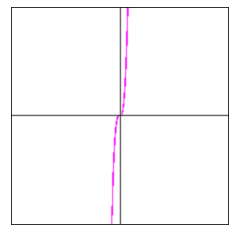

In [159]:
x,y_val,height=0,0,0 #initializing variables
total_info =[] #initializing list
pixels=[]
delta = 0
scalar = 15
for i in range (0,dimensions): #iterates through every pixel
    x = (i*x_dim/dimensions)+l_bound #finds the x value for the function which isn't the same as pixel #
    y_val=eval(equation) #finds value of function
    height=u_bound-y_val #essentially is finding area above point in mathematical scale
    height/=y_dim #Scales it to pixel value
    height*=dimensions #scales it to pixel value p.2
    height=round(height) # rounds it because pixels and indices can't be decimals
    pixels.append(height) # adds it to list of all y values
    if i != 0:
        delta = int(round((height-pixels[i-1])*scalar)) # this finds the difference in height between the pixel and the next : You can scale deriv with scalar multiplier for increased thicccness
    info=[height,delta,i] # this makes it a list, a nice lil' package of info with pixel value (height), slope, and horizantal coordinate - the delta which is like slope will be negative what it looks like on graph
    total_info.append(info) # adds to master list
#print(total_info) - if you care to see the info
#print(total_info[1]) - calls a specific list
for i in range (0,dimensions): #goes through every column of pixels
    if 0<pixels[i]<dimensions: #checks to see if index will correspond to a pixel before continuing
        graph[(pixels[i]),round(i),1]=0 #changes rgb value of pixel to different
# filling in line if there are spaces
for i in range (0,dimensions): #iterates through every pixel
    if 0<total_info[i][0]+total_info[i][1]/scalar<dimensions or 0<total_info[i][0]<dimensions:#makes sure either pixel is in y range or pixel+deriv are in y range (meaning line will cross into frame)
        for y in range (0,abs(total_info[i][1])): #repeats based off of slope - steeper slope = more pixels to fill in.
            x = (i*x_dim/dimensions)+l_bound+(y/abs(total_info[i][1]))#figures out x value for mathematical function based off of pixel
            y_val=eval(equation) #finds y val
            height=u_bound-y_val #converts to pixel val
            height/=y_dim  #converts to pixel val
            height*=dimensions #converts to pixel val
            height=round(height) #converts to pixel val
            if 0<height<dimensions: #checks if in range
                graph[(height),i+round(y/abs(total_info[i][1])),1]=0 #changes color
imshow(graph) #finally prints out our graph